## Neural Networks from Scratch
### Chapter 6

In [1]:
from IPython.display import Image, display
from IPython.core.display import HTML 

In [95]:
import numpy as np

class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(np.array(inputs), self.weights) + self.biases

class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)        

class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values/np.sum(exp_values, axis=1, keepdims=True)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class LossCategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        n_samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(n_samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

### 6.1 Random Search NN Weights

In [91]:
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

nnfs.init()

In [92]:
X, y = vertical_data(samples=100, classes=3)

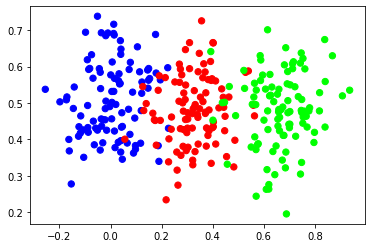

In [94]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [131]:
dense1 = LayerDense(2,3)
activation1 = ActivationReLU()

dense2 =LayerDense(3,3)
activation2 = ActivationSoftmax()

loss_function = LossCategoricalCrossentropy()

In [132]:
lowest_loss = 999999

In [133]:
best_dense1_weights = dense1.weights.copy() 
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [134]:
for iteration in range(2000):
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)

    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0993907 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0968655 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0951861 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0931047 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.0913415 acc: 0.6666666666666666
New set of weights found, iteration: 8 loss: 1.0899991 acc: 0.4166666666666667
New set of weights found, iteration: 13 loss: 1.0884162 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0869547 acc: 0.34
New set of weights found, iteration: 19 loss: 1.0833278 acc: 0.66
New set of weights found, iteration: 28 loss: 1.0798539 acc: 0.6633333333333333
New set of weights found, iteration: 29 loss: 1.076997 acc: 0.6
New set of weights found, iteration: 32 loss: 1.0743762 acc: 0.65
New set of weights found, iteration: 34 loss: 1.0733936 acc: 0.38333333333333336
New set of weights foun